In [1]:
# filter and check runs
import pandas as pd
from pathlib import Path
import numpy as np

def make_hash_columns(df, colname):
    df[colname + ".stem"] = df[colname].apply(lambda x: Path(x).stem)
    df[colname + ".hash"] = df[colname + ".stem"].apply(lambda x: x.split("_")[-1][:8])
    return df

models = ["cifar_vgg_16", "cifar_vgg_8", "cifar_vgg_16", "cifar_vgg_32" "cifar_vgg_16_64", "cifar_vgg_16_128", "cifar_vgg_16_256",
          "cifar_resnet_20", "cifar_resnet_20_16", "cifar_resnet_20_32", "cifar_resnet_20_64", "cifar_resnet_20_128", "cifar_resnet_20_256"]
datasets = ["cifar10"]
branches = ["main"]
replicates = list(range(1, 3))

runs = pd.read_csv("../refactor-outputs/run-hparams.csv")
runs = make_hash_columns(runs, "Path")

run_acc = pd.read_csv("../refactor-outputs/branch-test-acc.csv")
run_acc = make_hash_columns(run_acc, "experiment")
run_acc = make_hash_columns(run_acc, "branch")

runs["n_replicates"] = runs["Path.hash"].apply(lambda x: len(run_acc.loc[run_acc["experiment.hash"] == x, "replicate"].unique()))
print(runs.columns)

filter = (runs['Dataset.dataset_name'].isin(datasets)) &  \
        (runs['Model.model_name'].isin(models)) &  \
        (~runs['Pretraining Training.save_every_n_epochs'].isna())
filtered_runs = runs.loc[filter]

Index(['Unnamed: 0', 'Path', 'Dataset.dataset_name', 'Dataset.batch_size',
       'Model.model_name', 'Model.model_init', 'Model.batchnorm_init',
       'Pretraining Dataset.dataset_name', 'Pretraining Dataset.batch_size',
       'Pretraining Training.optimizer_name', 'Pretraining Training.lr',
       'Pretraining Training.training_steps', 'Pretraining Training.momentum',
       'Pretraining Training.milestone_steps', 'Pretraining Training.gamma',
       'Pretraining Training.weight_decay', 'Pruning.pruning_strategy',
       'Pruning.pruning_fraction', 'Training.optimizer_name', 'Training.lr',
       'Training.training_steps', 'Training.momentum',
       'Training.milestone_steps', 'Training.gamma', 'Training.weight_decay',
       'Logger.last_test_loss', 'Logger.last_test_accuracy',
       'Logger.last_test_examples', 'Logger.last_test_iter',
       'Pruning.pruning_layers_to_ignore', 'Dataset.subset_stride',
       'Pretraining Dataset.subset_stride',
       'Pretraining Training.sav

In [25]:
summary_columns = ["Path.hash", "Model.model_name", "Model.batchnorm_replace", "Logger.last_test_accuracy", "Pretraining Training.save_every_n_epochs", "n_replicates"]
print(filtered_runs.loc[filtered_runs["Model.model_name"].str.startswith("cifar_resnet"), summary_columns], "\n")
print(filtered_runs.loc[filtered_runs["Model.model_name"].str.startswith("cifar_vgg"), summary_columns], "\n")
# print(filtered_runs)

    Path.hash     Model.model_name Model.batchnorm_replace  \
3    36e983f0   cifar_resnet_20_32                     NaN   
5    2b51ccaa   cifar_resnet_20_64                     NaN   
8    f027090a  cifar_resnet_20_128                     NaN   
11   4ac6af11  cifar_resnet_20_256                     NaN   
13   88c67964   cifar_resnet_20_32                     NaN   
14   9d3a0059   cifar_resnet_20_32                     NaN   
15   d26a0f81   cifar_resnet_20_32                     NaN   
16   cd32bca3   cifar_resnet_20_32                     NaN   
17   02e3f446   cifar_resnet_20_32                     NaN   
18   944defa6   cifar_resnet_20_32                     NaN   
19   b05e8350   cifar_resnet_20_32                     NaN   
20   8fd850fd   cifar_resnet_20_32                     NaN   
21   e3104da8   cifar_resnet_20_32                     NaN   
22   11198243   cifar_resnet_20_32                     NaN   
23   5b9711ab   cifar_resnet_20_32                     NaN   
24   189

In [16]:
# branch acc
branch_prefix = "lottery_branch_transport_mask_"

import numpy as np
branches = pd.read_csv("../refactor-outputs/branch-test-acc.csv")
branches["hash"] = branches["experiment"].apply(lambda x: Path(x).stem)
branches["model"] = branches["hash"].apply(lambda x: runs.loc[x == runs["hash"], "Model.model_name"].item()[6:-3])
branches["dataset"] = branches["hash"].apply(lambda x: runs.loc[x == runs["hash"], "Dataset.dataset_name"].item()[:8])
branches["shorthash"] = branches["hash"].apply(lambda x: x[8:16])
branches["replicate"] = branches["replicate"].apply(lambda x: int(x[10:]))
branches["level"] = branches["level"].apply(lambda x: x[6:])
branches["shortbranch"] = branches["branch"].apply(lambda x: x[len(branch_prefix):len(branch_prefix)+8] if x != "main" else x)

In [17]:
filter = (branches["branch"].str.startswith(branch_prefix)) & (~branches["test_loss"].isna()) & (branches["test_accuracy"] < 0.3) & (branches["level"] != "pretrain")
filtered = branches.loc[filter]
print(len(filtered))
print(filtered[["shorthash", "model", "dataset", "replicate", "level", "shortbranch", "test_accuracy"]])

17
     shorthash model   dataset  replicate level shortbranch  test_accuracy
3951  37ac5d99   vgg  pixelper          1    12    519f5035       0.100000
5139  ee3a8edc   vgg  cifar100          1    12    3be449eb       0.100000
5148  ee3a8edc   vgg  cifar100          1    16    dd2d2307       0.100000
5149  ee3a8edc   vgg  cifar100          1    16    3be449eb       0.100000
5150  ee3a8edc   vgg  cifar100          1    16    5b6423c8       0.100000
5176  ee3a8edc   vgg  cifar100          2     8    7b7f8c99       0.100000
5194  ee3a8edc   vgg  cifar100          2    16    6d1a0bea       0.100000
5195  ee3a8edc   vgg  cifar100          2    16    19647fef       0.100000
5196  ee3a8edc   vgg  cifar100          2    16    7b7f8c99       0.100000
5416  2123f376   vgg      svhn          1    12    28e03361       0.195874
5417  2123f376   vgg      svhn          1    12    5b6423c8       0.195874
5418  2123f376   vgg      svhn          1    12    215e365b       0.195874
5425  2123f376   vgg  

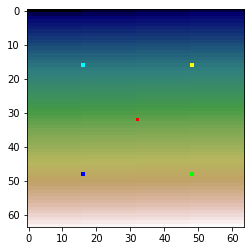

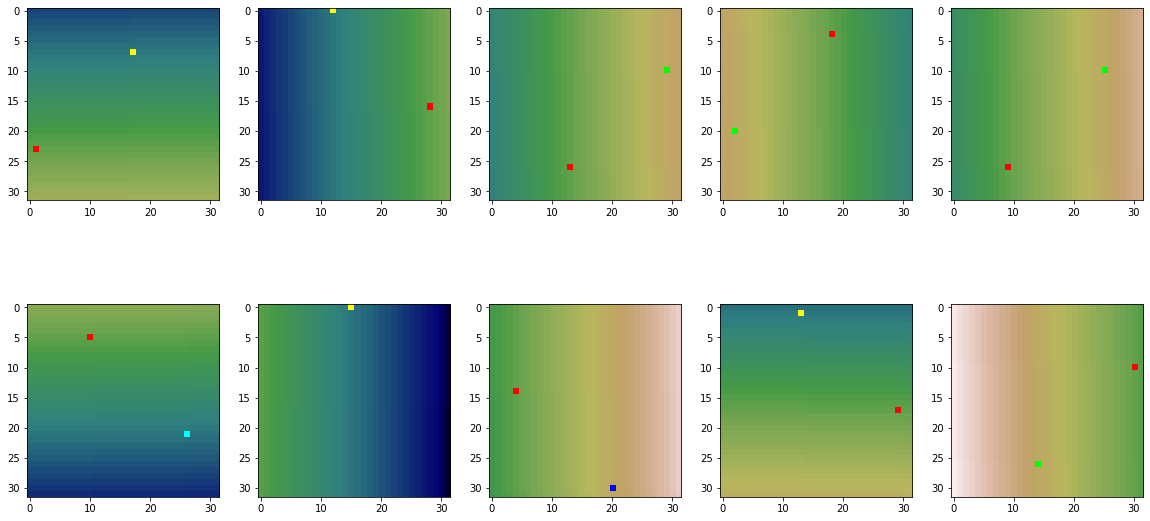

In [3]:
#check EuroSAT preprocessing
from PIL import Image
from matplotlib import cm, pyplot
import torchvision
import numpy as np


# transforms = torchvision.transforms.CenterCrop((32, 32))
transforms = torchvision.transforms.Compose([
    # get all eight 90 degree rotation + flip symmetries including identity
    torchvision.transforms.RandomChoice([
        lambda x: torchvision.transforms.functional.rotate(x, 0),
        lambda x: torchvision.transforms.functional.hflip(x),
        ]),
    torchvision.transforms.RandomChoice([
        lambda x: torchvision.transforms.functional.rotate(x, 0),
        lambda x: torchvision.transforms.functional.rotate(x, 90),
        lambda x: torchvision.transforms.functional.rotate(x, 180),
        lambda x: torchvision.transforms.functional.rotate(x, 270),
    ]),
    torchvision.transforms.RandomCrop((32, 32))
])

img = np.arange(64*64).reshape(64, 64) / (64*64)
img = cm.gist_earth(img)*255
img[32, 32] = (255, 0, 0, 255)
img[16, 16] = (0, 255, 255, 255)
img[48, 16] = (0, 0, 255, 255)
img[16, 48] = (255, 255, 0, 255)
img[48, 48] = (0, 255, 0, 255)
img = Image.fromarray(np.uint8(img))
pyplot.imshow(img)
pyplot.show()
fig, axes = pyplot.subplots(2, 5, figsize=(20, 10))
for ax in axes:
    for a in ax:
        a.imshow(transforms(img))
pyplot.show()

In [9]:
# check cifar100 superclass labels
import numpy as np


labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']
coarse_map = [4, 1, 14, 8, 0, 6, 7, 7, 18, 3,
            3, 14, 9, 18, 7, 11, 3, 9, 7, 11,
            6, 11, 5, 10, 7, 6, 13, 15, 3, 15,
            0, 11, 1, 10, 12, 14, 16, 9, 11, 5,
            5, 19, 8, 8, 15, 13, 14, 17, 18, 10,
            16, 4, 17, 4, 2, 0, 17, 4, 18, 17,
            10, 3, 2, 12, 12, 16, 12, 1, 9, 19,
            2, 10, 0, 1, 16, 12, 9, 13, 15, 13,
            16, 19, 2, 4, 6, 19, 5, 5, 8, 19,
            18, 1, 2, 15, 6, 0, 17, 8, 14, 13]
supercoarse_labels = ['aquatic_mammals-fish', 'flowers-fruit_and_vegetables', 'food_containers-people', 'household_electrical_devices-household_furniture', 'insects-non-insect_invertebrates', 'large_carnivores-large_omnivores_and_herbivores', 'large_man-made_outdoor_things-large_natural_outdoor_scenes', 'medium_mammals-small_mammals', 'reptiles-trees', 'vehicles_1-vehicles_2']
supercoarse_map = [0, 0, 1, 2, 1, 3, 3, 4, 5, 6, 6, 5, 7, 4, 2, 8, 7, 8, 9, 9]

In [10]:
for i, label in enumerate(labels):
    coarse_i = coarse_map[i]
    coarse = coarse_labels[coarse_i]
    supercoarse = supercoarse_labels[supercoarse_map[coarse_i]]
    print(i, label, coarse, supercoarse, sep="\t")

0	apple	fruit_and_vegetables	flowers-fruit_and_vegetables
1	aquarium_fish	fish	aquatic_mammals-fish
2	baby	people	food_containers-people
3	bear	large_carnivores	large_carnivores-large_omnivores_and_herbivores
4	beaver	aquatic_mammals	aquatic_mammals-fish
5	bed	household_furniture	household_electrical_devices-household_furniture
6	bee	insects	insects-non-insect_invertebrates
7	beetle	insects	insects-non-insect_invertebrates
8	bicycle	vehicles_1	vehicles_1-vehicles_2
9	bottle	food_containers	food_containers-people
10	bowl	food_containers	food_containers-people
11	boy	people	food_containers-people
12	bridge	large_man-made_outdoor_things	large_man-made_outdoor_things-large_natural_outdoor_scenes
13	bus	vehicles_1	vehicles_1-vehicles_2
14	butterfly	insects	insects-non-insect_invertebrates
15	camel	large_omnivores_and_herbivores	large_carnivores-large_omnivores_and_herbivores
16	can	food_containers	food_containers-people
17	castle	large_man-made_outdoor_things	large_man-made_outdoor_things-l

In [16]:
for i in range(10):
    print(supercoarse_labels[i])
    for j in np.where(np.array(supercoarse_map) == i)[0]:
        print("\t", coarse_labels[j])
        for k in np.where(np.array(coarse_map) == j)[0]:
            print("\t\t", labels[k])

aquatic_mammals-fish
	 aquatic_mammals
		 beaver
		 dolphin
		 otter
		 seal
		 whale
	 fish
		 aquarium_fish
		 flatfish
		 ray
		 shark
		 trout
flowers-fruit_and_vegetables
	 flowers
		 orchid
		 poppy
		 rose
		 sunflower
		 tulip
	 fruit_and_vegetables
		 apple
		 mushroom
		 orange
		 pear
		 sweet_pepper
food_containers-people
	 food_containers
		 bottle
		 bowl
		 can
		 cup
		 plate
	 people
		 baby
		 boy
		 girl
		 man
		 woman
household_electrical_devices-household_furniture
	 household_electrical_devices
		 clock
		 keyboard
		 lamp
		 telephone
		 television
	 household_furniture
		 bed
		 chair
		 couch
		 table
		 wardrobe
insects-non-insect_invertebrates
	 insects
		 bee
		 beetle
		 butterfly
		 caterpillar
		 cockroach
	 non-insect_invertebrates
		 crab
		 lobster
		 snail
		 spider
		 worm
large_carnivores-large_omnivores_and_herbivores
	 large_carnivores
		 bear
		 leopard
		 lion
		 tiger
		 wolf
	 large_omnivores_and_herbivores
		 camel
		 cattle
		 chimpanzee
		